# Car Price Prediction (ML Regression)


#### In this notebook, I have made an attempt to develop a model to predict the car prices using ML Regression. The dataset for the project is taken from Kaggle. Here, I have implemented various ML regression models and finally selected Voting Regressor as it gave me best scores for efficient model deployment.

## Importing the Libraries and the Dataset 

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
data=pd.read_csv('car-data.csv')
print(data.shape)
data.head()

(15157, 8)


,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


From the dataset preview, Selling_Price is the dependent variable and the rest are independent variables

## Checking if there are any missing values

In [3]:
data.isnull().sum()

year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

There are no missing values in the dataset

## Checking cardinality of independent categorical variables in the dataset

In [4]:

print('Unique elements in Fuel_Type are',data['fuelType'].unique())
print('Unique elements in Transmission are',data['transmission'].unique())
print('Unique elements in Year are',data['year'].unique())

Unique elements in Fuel_Type are ['Diesel' 'Petrol' 'Other' 'Hybrid']
Unique elements in Transmission are ['Automatic' 'Manual' 'Semi-Auto']
Unique elements in Year are [2019 2020 2018 2017 2015 2016 2013 2014 2009 2010 2004 2003 2012 2011
 2008 2000 2006 2002 2005 2007 2001]


In [5]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


# Feature Engineering

Dropping the Car_Name Column

In [6]:
dataset=data[['price','year','mpg','tax','fuelType','engineSize','transmission','mileage']]
dataset.head()

,price,year,mpg,tax,fuelType,engineSize,transmission,mileage
0,25000,2019,49.6,145,Diesel,2.0,Automatic,13904
1,26883,2019,49.6,145,Diesel,2.0,Automatic,4562
2,20000,2019,50.4,145,Diesel,2.0,Manual,7414
3,33492,2019,32.5,145,Petrol,2.0,Automatic,4825
4,22900,2019,39.8,150,Petrol,1.5,Semi-Auto,6500


#### Let's make a feature variable 'Present_Year' which has all the element values as 2020. On subtracting 'Present_Year' and 'Year', we can make another feature variable as 'Number_of_Years_Old', which gives us idea about how old the car is.  

In [7]:
dataset['Present_Year']=2021
dataset['Number_of_Years_Old']=dataset['Present_Year']- dataset['year']
dataset.head()

<ipython-input-7-0d1ed3a0d149>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Present_Year']=2021
<ipython-input-7-0d1ed3a0d149>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Number_of_Years_Old']=dataset['Present_Year']- dataset['year']


,price,year,mpg,tax,fuelType,engineSize,transmission,mileage,Present_Year,Number_of_Years_Old
0,25000,2019,49.6,145,Diesel,2.0,Automatic,13904,2021,2
1,26883,2019,49.6,145,Diesel,2.0,Automatic,4562,2021,2
2,20000,2019,50.4,145,Diesel,2.0,Manual,7414,2021,2
3,33492,2019,32.5,145,Petrol,2.0,Automatic,4825,2021,2
4,22900,2019,39.8,150,Petrol,1.5,Semi-Auto,6500,2021,2


So, we can now safely drop 'Year' and 'Present_Year' columns 

In [8]:
dataset.drop(labels=['year', 'Present_Year'],axis=1,inplace=True)
dataset.head()

,price,mpg,tax,fuelType,engineSize,transmission,mileage,Number_of_Years_Old
0,25000,49.6,145,Diesel,2.0,Automatic,13904,2
1,26883,49.6,145,Diesel,2.0,Automatic,4562,2
2,20000,50.4,145,Diesel,2.0,Manual,7414,2
3,33492,32.5,145,Petrol,2.0,Automatic,4825,2
4,22900,39.8,150,Petrol,1.5,Semi-Auto,6500,2


## Encoding the Categorical Variables

In [9]:
#select categorical variables from then dataset, and then implement categorical encoding for nominal variables
Fuel_Type=dataset[['fuelType']]
Fuel_Type=pd.get_dummies(Fuel_Type, drop_first=True)


In [10]:

Transmission=dataset[['transmission']]
Transmission=pd.get_dummies(Transmission, drop_first=True)

In [11]:


dataset=pd.concat([dataset,Fuel_Type,Transmission], axis=1)

dataset.drop(labels=['fuelType', 'transmission'], axis=1, inplace=True)

dataset.head()

,price,mpg,tax,engineSize,mileage,Number_of_Years_Old,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Manual,transmission_Semi-Auto
0,25000,49.6,145,2.0,13904,2,0,0,0,0,0
1,26883,49.6,145,2.0,4562,2,0,0,0,0,0
2,20000,50.4,145,2.0,7414,2,0,0,0,1,0
3,33492,32.5,145,2.0,4825,2,0,0,1,0,0
4,22900,39.8,150,1.5,6500,2,0,0,1,0,1


In [12]:
dataset.columns

Index(['price', 'mpg', 'tax', 'engineSize', 'mileage', 'Number_of_Years_Old',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol',
       'transmission_Manual', 'transmission_Semi-Auto'],
      dtype='object')

Now, the encoding has been done 

In [13]:
# Dataset Correlation
dataset.corr()

,price,mpg,tax,engineSize,mileage,Number_of_Years_Old,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Manual,transmission_Semi-Auto
price,1.000000,-0.496844,0.482964,0.575139,-0.517599,-0.614748,0.096566,0.043410,-0.242342,-0.516948,0.357926
mpg,-0.496844,1.000000,-0.518440,-0.277009,0.328949,0.297173,0.469737,0.015599,-0.194543,0.263480,-0.181092
tax,0.482964,-0.518440,1.000000,0.291077,-0.330231,-0.365796,0.000182,0.022648,-0.010473,-0.267064,0.157020
engineSize,0.575139,-0.277009,0.291077,1.000000,0.110513,-0.004957,-0.039786,0.005750,-0.646242,-0.418441,0.271924
mileage,-0.517599,0.328949,-0.330231,0.110513,1.000000,0.762574,-0.005767,-0.025097,-0.216018,0.161377,-0.135747
Number_of_Years_Old,-0.614748,0.297173,-0.365796,-0.004957,0.762574,1.000000,-0.041899,-0.033499,-0.051410,0.197946,-0.165943
fuelType_Hybrid,0.096566,0.469737,0.000182,-0.039786,-0.005767,-0.041899,1.000000,-0.007467,-0.111846,-0.125882,0.096874
fuelType_Other,0.043410,0.015599,0.022648,0.005750,-0.025097,-0.033499,-0.007467,1.000000,-0.086469,-0.054109,-0.041778
fuelType_Petrol,-0.242342,-0.194543,-0.010473,-0.646242,-0.216018,-0.051410,-0.111846,-0.086469,1.000000,0.175021,-0.100265
transmission_Manual,-0.516948,0.263480,-0.267064,-0.418441,0.161377,0.197946,-0.125882,-0.054109,0.175021,1.000000,-0.738299


## Data Visualization and Correlation

<AxesSubplot:>

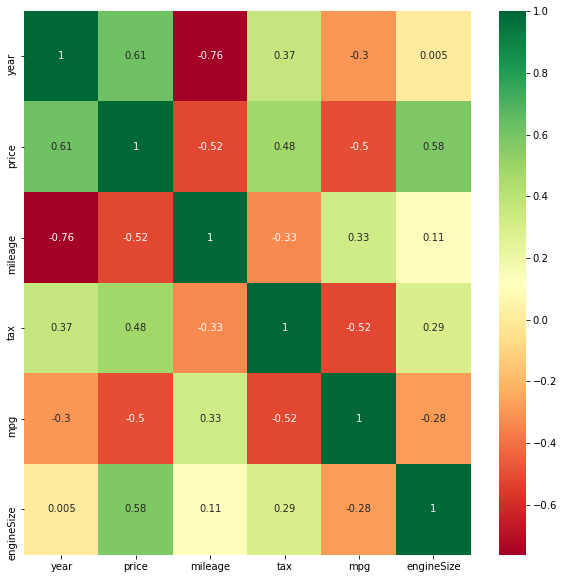

In [14]:
#Correlations of features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#Plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
sell = dataset['price']
dataset.drop(['price'],axis=1,inplace=True)
dataset=dataset.join(sell)
dataset.head()

,mpg,tax,engineSize,mileage,Number_of_Years_Old,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Manual,transmission_Semi-Auto,price
0,49.6,145,2.0,13904,2,0,0,0,0,0,25000
1,49.6,145,2.0,4562,2,0,0,0,0,0,26883
2,50.4,145,2.0,7414,2,0,0,0,1,0,20000
3,32.5,145,2.0,4825,2,0,0,1,0,0,33492
4,39.8,150,1.5,6500,2,0,0,1,0,1,22900


In [16]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

[0.22179089 0.07839882 0.13686178 0.11231709 0.1844123  0.00426915
 0.00077307 0.03572285 0.22213531 0.00331872]


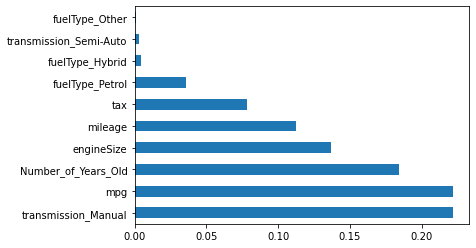

In [17]:
### To determine important features, make use of ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

'Owner' has zero feature importance i.e. nil on the dependent variable, 'Selling_Price'

## Model Building and Training

In [18]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import StratifiedKFold
#kfold = StratifiedKFold(n_splits=3)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Decision Tree Regressor

Decision Tree Score on Training set is 0.9988288148305331
Decision Tree Score on Test Set is 0.8934726751369897
[0.90396261 0.89181981 0.88084562 0.90201598 0.90710023]
Accuracy: 89.71 %
Standard Deviation: 0.96 %
Mean Absolute Error: 1552.562217824685
Mean Squared Error: 6490687.234005912
RMSE: 2547.6827184729877
The r2_score is 0.8934726751369897


C:\Users\bashi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


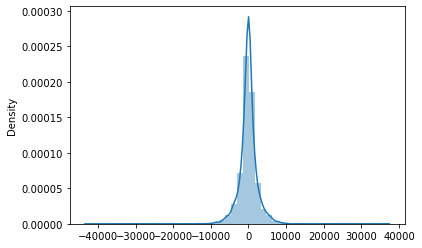

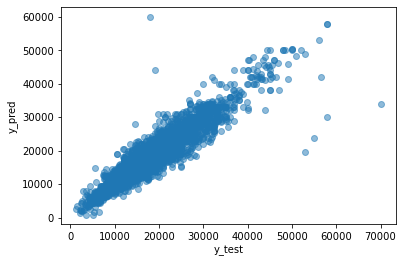

In [21]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(dt_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### Random Forest Regressor

Random Forest Score on Training set is 0.9652241333386965
Random Forest Score on Test Set is 0.9335612287480377
[0.93542459 0.93459887 0.92835967 0.94606427 0.93797102]
Accuracy: 93.65 %
Standard Deviation: 0.57 %
Mean Absolute Error: 1239.2816753741959
Mean Squared Error: 4048100.1936610932
RMSE: 2011.989113703425
The r2_score is 0.9335612287480377


C:\Users\bashi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


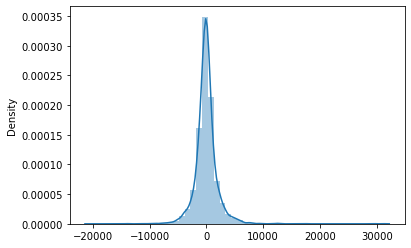

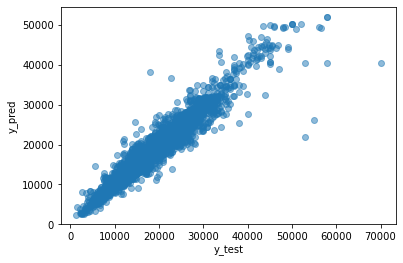

In [22]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_features='auto', max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)

print("Random Forest Score on Training set is",rf_reg.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(rf_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### Voting Regressor

##### Voting Regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset to average the individual predictions to form a final prediction.

Voting Regresssor Score on Training set is 0.9904260367743519
Voting Regresssor Score on Test Set is 0.9239911076742436
[0.93146412 0.92751292 0.91615562 0.93660767 0.93385971]
Accuracy: 92.91 %
Standard Deviation: 0.71 %
Mean Absolute Error: 1315.8923473676539
Mean Squared Error: 4631205.634086319
RMSE: 2152.0236137380834
The r2_score is 0.9239911076742436


C:\Users\bashi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


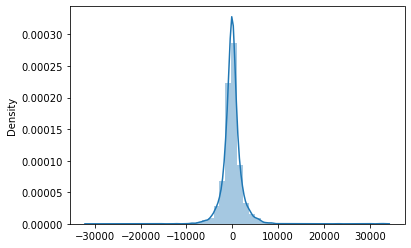

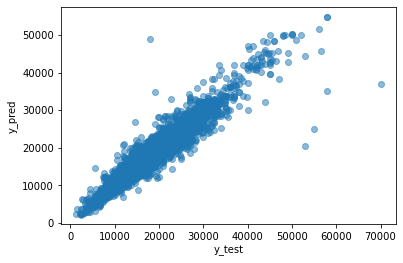

In [23]:
from sklearn.ensemble import VotingRegressor
vot_reg = VotingRegressor([('DecisionTree', dt_reg), ('RandomForestRegressor', rf_reg)])
vot_reg.fit(X_train, y_train)
y_pred=vot_reg.predict(X_test)

print("Voting Regresssor Score on Training set is",vot_reg.score(X_train, y_train))#Training Accuracy
print("Voting Regresssor Score on Test Set is",vot_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(vot_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

So, the XGBoost Regressor gave us best scores on the Training Dataset

## Dump the model selected as a Pickle File

In [25]:
import pickle
pickle.dump(vot_reg, open("vot_reg.pkl", "wb"))

# load model from file
model = pickle.load(open("vot_reg.pkl", "rb"))

model.predict([[7414, 50.4, 145, 2.0, 2, 0, 0,0, 1,0]])

array([20690.71316053])